## Create trajectory generator class

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class trajectoryGenerator:
    
    #list of start points and end points and corresponding max velocities,
    #period is in how fast the output command is sent to the robot, unit should be same as velocity
    def creatTrajectoryMaxVelocity(self, startPoints, endPoints, maxVelocities, period):
        
        startPoints = np.array(startPoints)
        endPoints = np.array(endPoints)
        maxVelocities = np.array(maxVelocities)
        
        dist = np.abs(endPoints - startPoints)
        
        #cubic spline has maximum velocity at the center (1.5 distance/sample)
        numPoints_list = (np.ceil(1.5*(dist/(period*maxVelocities)))).astype(int)
                        
        trajectory = np.ones((len(startPoints), np.max(numPoints_list)))
        time = np.linspace(0, np.max(numPoints_list)*period, np.max(numPoints_list))
                
        for i in range(0, len(startPoints)):
            trajectory[i, :numPoints_list[i]] = self.createTrajectoryNumPoints(startPoints[i], endPoints[i], numPoints_list[i])
            trajectory[i, numPoints_list[i]:] = endPoints[i]
            
        return trajectory, time
    
    def createTrajectoryNumPoints(self, startPoints, endPoints, num_points):
        
        startPoints = np.array(startPoints)
        endPoints = np.array(endPoints)
        
        #Create smooth function with cubic spline
        # y = -2x^3 + 3x^2
        x = np.linspace(0, 1, num_points)
        y = (-2*x**3 + 3*x**2)
        
        dist = endPoints - startPoints
        if dist.size > 1:
            numDim = len(dist)
        else:
            numDim = 1
            
        trajectory = np.ones((numDim, num_points))
        
        if numDim > 1:
            for i in range(0, numDim):
                trajectory[i, :] = dist[i]*y + startPoints[i]
        else:
            trajectory[0, :] = dist*y + startPoints
            
        return trajectory
        
    def plotTrajectory(self, trajectory, time = None):
        for i in range(0, trajectory.shape[0]):
            if time is not None:
                plt.plot(time, trajectory[i,:])
            else:
                plt.plot(trajectory[i,:])
        plt.show()

## Test point based trajectory generator

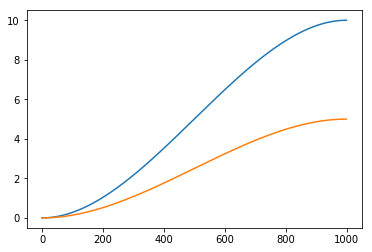

In [9]:
trajPlanner = trajectoryGenerator()

trajectories = trajPlanner.createTrajectoryNumPoints(np.array([0,0]), [10,5], 1000)
trajPlanner.plotTrajectory(trajectories)

In [10]:
trajectories.shape

(2, 1000)

## Test max velocity trajectory generator

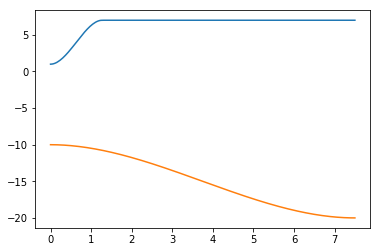

Computed max velocity: 7.067152646158327
Computed max velocity: 1.9999468537415435


In [11]:
trajPlanner = trajectoryGenerator()

period = 1.0/30.0 # 30 Hz

trajectories, time = trajPlanner.creatTrajectoryMaxVelocity(np.array([1,-10]), [7,-20], [7,2], period)

trajPlanner.plotTrajectory(trajectories, time)

for j in range(0, trajectories.shape[0]):
    maxVel = 0
    for i in range(1, trajectories.shape[1]):
        vel = np.abs(trajectories[j,i] - trajectories[j,i-1])/(time[i] - time[i-1])
        if vel > maxVel:
            maxVel = vel

    print("Computed max velocity: {}".format(maxVel))